## Figure 3

C:\Users\20192\AppData\Local\Temp\ipykernel_20808\868087635.py:24: RuntimeWarning: invalid value encountered in sqrt
  dvt = k * (θ - vt[-1]) * dt + ε * np.sqrt(vt[-1]) * Z1[time, _] * np.sqrt(dt)
C:\Users\20192\AppData\Local\Temp\ipykernel_20808\868087635.py:26: RuntimeWarning: invalid value encountered in sqrt
  ax[0].plot(t, np.sqrt(vt), color = 'black', linewidth = 0.5)
C:\Users\20192\AppData\Local\Temp\ipykernel_20808\868087635.py:41: RuntimeWarning: invalid value encountered in sqrt
  dvt = vt[-1] * (k * (θ - vt[-1]) * dt + ε * np.sqrt(vt[-1]) * Z2[time, _] * np.sqrt(dt))
C:\Users\20192\AppData\Local\Temp\ipykernel_20808\868087635.py:43: RuntimeWarning: invalid value encountered in sqrt
  ax[1].plot(t, np.sqrt(vt), color = 'black', linewidth = 0.5)


Text(0.5, 1.0, '3/2 Model')

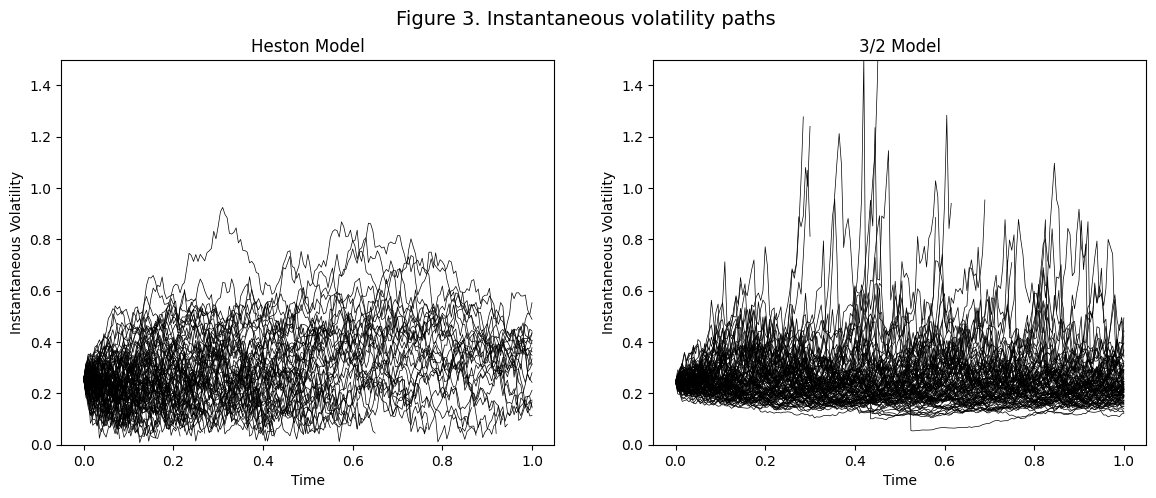

In [4]:
import numpy as np
import matplotlib.pyplot as plt
n_observe = int(1e2)
dt = 5e-3
texp = 1
n_dt = int(texp / dt)
t = np.arange(0, dt+1, dt)

Z1 = np.random.standard_normal((n_observe, n_dt))
Z2 = np.random.standard_normal((n_observe, n_dt))

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Figure 3. Instantaneous volatility paths', fontsize = 14)

# parameters for Heston model
v0 = 0.2556 ** 2
k = 3.8
θ = 0.3095 ** 2
ε = 0.9288
# Heston Model Sigma path
for time in range(n_observe):
    vt = [v0]
    for _ in range(n_dt):
        dvt = k * (θ - vt[-1]) * dt + ε * np.sqrt(vt[-1]) * Z1[time, _] * np.sqrt(dt)
        vt.append(vt[-1] + dvt)
    ax[0].plot(t, np.sqrt(vt), color = 'black', linewidth = 0.5)
ax[0].set_ylim(0, 1.5)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Instantaneous Volatility')
ax[0].set_title('Heston Model')

# parameters for 3/2 model
v0 = 0.2450 ** 2
k = 22.84
θ = 0.4669 ** 2
ε = 8.56
# 3/2 Model Sigma Path
for time in range(n_observe):
    vt = [v0]
    for _ in range(n_dt):
        dvt = vt[-1] * (k * (θ - vt[-1]) * dt + ε * np.sqrt(vt[-1]) * Z2[time, _] * np.sqrt(dt))
        vt.append(vt[-1] + dvt)
    ax[1].plot(t, np.sqrt(vt), color = 'black', linewidth = 0.5)
ax[1].set_ylim(0, 1.5)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Instantaneous Volatility')
ax[1].sharey(ax[0])
ax[1].set_title('3/2 Model')

## Figure 4

In [5]:
import pyfeng as pf
strike = np.arange(0.9, 1.1, 0.01)
spot = 1.0
texp = 1/12
X = np.log(strike/spot*np.exp(0.03*texp))
# parameters for Heston model
v0 = 0.2556 ** 2
k = 3.8
θ = 0.3095 ** 2
ε = 0.9288
ρ = -0.7829

# MS Expansion
sqrt_v0 =  np.sqrt(v0)
I_heston = sqrt_v0 + ρ*ε*X/(4*sqrt_v0) + (1-5*ρ**2/2)*(ε**2*X**2)/(24*sqrt_v0**3) + \
        (k*(θ-v0)/(4*sqrt_v0) + ρ*ε*sqrt_v0/8 + ρ**2*ε**2/(96*sqrt_v0) - ε**2/(24*sqrt_v0)) * texp

# True model
m = pf.HestonFft(v0, vov = ε, mr = k, rho = ρ, theta = θ)
p = m.price(strike, spot, texp)
demovol = pf.Bsm(sigma = 1)
impvol_heston = demovol.impvol(p, strike, spot, texp)

In [6]:
strike = np.arange(0.9, 1.1, 0.01)
spot = 1.0
texp = 1/12
X = np.log(strike/spot*np.exp(0.33*texp))
# parameters for 3/2 model
v0 = 0.2450 ** 2
k = 22.84
θ = 0.4669 ** 2
ε = 8.56
ρ = -0.99

# MS Expansion
sqrt_v0 =  np.sqrt(v0)
I_32 = sqrt_v0 + ρ*ε*X*sqrt_v0/4 + (1-ρ**2/2)*(ε**2*X**2*sqrt_v0)/24 + \
        (k*(θ-v0)/4 + ρ*ε*v0/8 + 7*ρ**2*ε**2*v0/96 - ε**2*v0/24) * (texp*sqrt_v0)

# True model
m = pf.Sv32Fft(v0, vov = ε, mr = k, rho = ρ, theta = θ)
p = m.price(strike, spot, texp)
demovol = pf.Bsm(sigma = 1)
impvol_32 = demovol.impvol(p, strike, spot, texp)

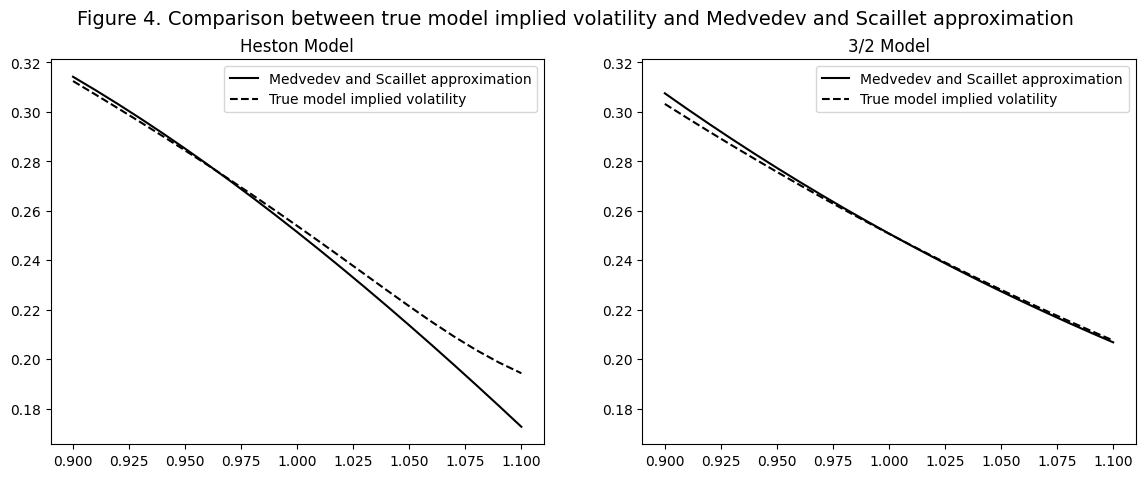

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
fig.suptitle('Figure 4. Comparison between true model implied volatility and Medvedev and Scaillet approximation', fontsize = 14)

ax[0].plot(strike, I_heston, color = 'black')
ax[0].plot(strike, impvol_heston, color = 'black', linestyle = '--')
ax[0].legend(['Medvedev and Scaillet approximation', 'True model implied volatility'])
ax[0].set_title('Heston Model')

ax[1].plot(strike, I_32, color = 'black')
ax[1].plot(strike, impvol_32, color = 'black', linestyle = '--')
ax[1].legend(['Medvedev and Scaillet approximation', 'True model implied volatility'])
ax[1].set_title('3/2 Model')
ax[1].sharey(ax[0])

## $\mathcal{L}(\cdot)$ for Heston Model and 3/2 Model

### Heston Model

In [8]:
def L_C0_heston(λ, k, θ, ε, T, v0):
    λ /= T
    γ = np.sqrt(k**2 + 2*λ*ε**2)
    b_0T = 2*λ*(np.exp(γ*T)-1)/((γ+k)*(np.exp(γ*T)-1) + 2*γ)
    α = γ + k
    β = γ - k

    a_0T = (k*θ/ε**2) * (k-γ)*T

    dt = 1e-3
    n_dt = int(T / dt)
    t = np.arange(0, T, dt)
    for k in range(n_dt-1):
        part1 = α*np.exp(γ*(T-t[k+1]))
        part2 = β*np.exp(-γ*dt)
        a_0T -= (2*k*θ/ε**2) * np.log((part1+part2) / (part1+β))

    L = np.exp(a_0T - b_0T*v0)
    return L

In [9]:
# parameters for Heston model
v0 = 0.2556 ** 2
k = 3.8
θ = 0.3095 ** 2
ε = 0.9288
ρ = -0.7829
T = 0.5

L_C0_heston(complex(1, 1), k, θ, ε, T, v0)

(-30.488450529906167+7.117368797015727j)

### 3/2 Model

In [10]:
from scipy.special import gamma
def L_C0_32(λ, k, θ, ε, T, v0):
    λ /= T
    p = -k
    q = λ
    α = -(1/2 + p/ε**2) + np.sqrt((1/2 + p/ε**2)**2 + 2*q/ε**2)
    γ = 2*(α+1-p/ε**2)
    y = v0/(k*θ)*(np.exp(k*θ*T) - 1)

    # scipy.special.hyp1f1 does not apply to complex number
    # Instead we expand M to 3rd term and it is precision enough
    z = -2/(ε**2*y)
    M = 1 + α/γ*z + α*(α+1)/(γ*(γ+1))*z**2/2 + α*(α+1)*(α+2)/(γ*(γ+1)*(γ+2))*z**3/6

    L = gamma(γ-α)/gamma(γ) * (2/(ε**2*y))**α * M
    return L

In [11]:
# parameters for 3/2 model
v0 = 0.2450 ** 2
k = 22.84
θ = 0.4669 ** 2
ε = 8.56
ρ = -0.99
T = 0.5

L_C0_32(complex(1, 1), k, θ, ε, T, v0)

(0.7176830414883731-0.16415364618353154j)